In [2]:
import pandas as pd
import numpy as np
import statistics as sts
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1
# Определить два вектора, представляющие собой число автомобилей,припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже. 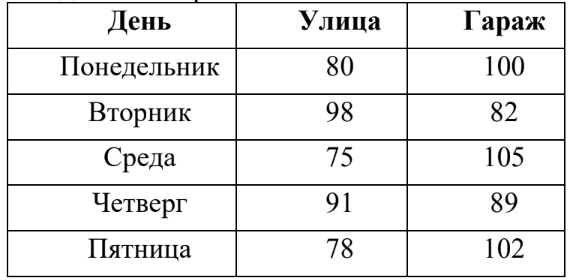

Задание 1.1
Найти и интерпретировать корреляцию между переменными
«Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [3]:
data = {
    "День": ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница"],
    "Улица": [80, 98, 75, 91, 78],
    "Гараж": [100, 82, 105, 89, 102]
}

df = pd.DataFrame(data)
print(sts.correlation(df['Улица'], df['Гараж']))
print('Емельянов')

-1.0
Емельянов


коэфф = -1 следавательно отризательную корреляцию


Задание 1.2 Построить диаграмму рассеяния для вышеупомянутых переменных.

Емельянов


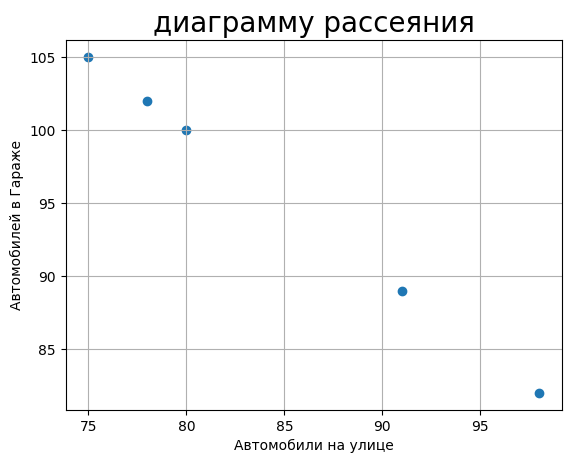

In [ ]:
plt.grid(True)
plt.title('диаграмму рассеяния', fontsize = 20)
plt.xlabel('Автомобили на улице')
plt.ylabel('Автомобилей в Гараже')
plt.scatter(x=df['Улица'], y=df['Гараж'], marker='o')
print('Емельянов')

Задание 2 Найти и выгрузить данные. Вывести, провести предобработку и
описать признаки.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/TrainDataFlight.csv')
print(df.isnull().sum())
print('Емельянов')

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Weight     0
dtype: int64
Емельянов


In [ ]:
print(df.head())
print('Емельянов')

         Species  Length1  Length2  Length3   Height   Width  Weight
0     Cypselurus     35.0     38.5     44.1  18.0369  6.3063   920.0
1  Hirundichthys     10.0     10.5     11.6   1.9720  1.1600     7.5
2     Cypselurus     23.9     26.5     31.1  12.3778  4.6961   340.0
3      Exocoetus     24.0     26.0     29.2   8.8768  4.4968   290.0
4   Parexocoetus     18.4     20.0     22.4   8.8928  3.2928   150.0
Емельянов


In [ ]:
print(df['Species'].value_counts())
print('Емельянов')

Species
Cheilopogon      41
Cypselurus       28
Exocoetus        16
Fodiater         14
Parexocoetus     10
Hirundichthys     8
Prognichthys      2
Name: count, dtype: int64
Емельянов


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print('Емельянов')

Емельянов


In [ ]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,1,35.0,38.5,44.1,18.0369,6.3063,920.0
1,4,10.0,10.5,11.6,1.9720,1.1600,7.5
2,1,23.9,26.5,31.1,12.3778,4.6961,340.0
3,2,24.0,26.0,29.2,8.8768,4.4968,290.0
4,5,18.4,20.0,22.4,8.8928,3.2928,150.0


Задание 2.1  Построить корреляционную матрицу по одной целевой переменной.
Определить наиболее коррелирующую переменную, продолжить с
ней работу в следующем пункте.

In [ ]:
corr = df.corr()
print(corr['Weight'].drop('Weight').sort_values())
print('Емельянов')

Species   -0.156493
Height     0.690560
Width      0.888698
Length1    0.924209
Length2    0.927185
Length3    0.929916
Name: Weight, dtype: float64
Емельянов


Вывод: наиболее корелироемая переменная с Weight это Length3





Задание 2.2 Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [ ]:
import numpy as np

# Определим целевую и независимую переменные
X = df['Length3'].values
y = df['Weight'].values

# Рассчитаем средние значения
X_mean = np.mean(X)
y_mean = np.mean(y)

# Вычислим наклон и сдвиг вручную
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean

# Предсказания и расчет MSE
y_pred = slope * X + intercept
mse = np.mean((y - y_pred) ** 2)

print(f"Наклон (slope): {slope}")
print(f"Сдвиг (intercept): {intercept}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print('Емельянов')

Наклон (slope): 29.140308832181173
Сдвиг (intercept): -516.3938355211644
Среднеквадратичная ошибка (MSE): 18852.57812024218
Емельянов


Задание 2.3 Визуализировать регрессию на графике.

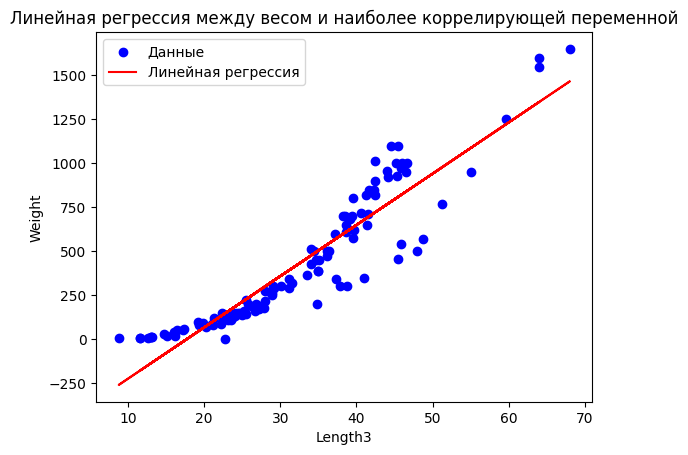

Емельянов


In [ ]:
import matplotlib.pyplot as plt

# Построим график
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.title('Линейная регрессия между весом и наиболее коррелирующей переменной')
plt.legend()
plt.show()
print('Емельянов')

Задание 3 Загрузить данные: 'insurance.csv'. Вывести и провести предобработку.
Вывести список уникальных регионов.

In [ ]:
df= pd.read_csv('/content/insurance.csv')
print(df.head())
print('Емельянов')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Емельянов


Задание 3.1
Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя первый способ,
через библиотеку Scipy.

In [ ]:
from scipy import stats

# Разделим данные по регионам
regions = df['region'].unique()
bmi_by_region = [df[df['region'] == region]['bmi'] for region in regions]

# Выполним однофакторный ANOVA-тест
f_stat, p_value = stats.f_oneway(*bmi_by_region)
print("ANOVA тест через SciPy: F-статистика =", f_stat, ", p-значение =", p_value)


ANOVA тест через SciPy: F-статистика = 39.49505720170283 , p-значение = 1.881838913929143e-24


Как можно видеть p-value меньше 0.05, а значит мы отвергаем нулевую гипотезу и можем сказать, что фактор региона оказывает статистически значимое влияение на индекс массы тела

Задание 3.2
Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя второй способ, с
помощью функции anova_lm() из библиотеки statsmodels.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Определим модель и выполним ANOVA
model = ols('bmi ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA тест через statsmodels:\n", anova_table)


ANOVA тест через statsmodels:
                  sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


Задание 3.3
С помощью t критерия Стьюдента перебрать все пары. Определить
поправку Бонферрони. Сделать выводы.

In [ ]:
from itertools import combinations
from scipy.stats import ttest_ind

# Перебираем все пары регионов и применяем T-критерий
pairwise_results = []
bonferroni_correction = 0.05 / len(list(combinations(regions, 2)))  # поправка Бонферрони

for (region1, region2) in combinations(regions, 2):
    bmi_region1 = df[df['region'] == region1]['bmi']
    bmi_region2 = df[df['region'] == region2]['bmi']
    t_stat, p_value = ttest_ind(bmi_region1, bmi_region2)
    pairwise_results.append((region1, region2, t_stat, p_value, p_value < bonferroni_correction))

# Вывод результатов
print("T-критерий для всех пар (с поправкой Бонферрони):")
for result in pairwise_results:
    print(result)


T-критерий для всех пар (с поправкой Бонферрони):
('southwest', 'southeast', -5.908373821545118, 5.4374009639680636e-09, True)
('southwest', 'northwest', 3.2844171500398582, 0.001076958496307695, True)
('southwest', 'northeast', 3.1169000930045923, 0.0019086161671573072, True)
('southeast', 'northwest', 9.25649013552548, 2.643571405230106e-19, True)
('southeast', 'northeast', 8.790905562598699, 1.186014937424813e-17, True)
('northwest', 'northeast', 0.060307727183293185, 0.951929170821864, False)


На основе полученных результатов теста можно сказать, что фактор региона оказывает значимое влияние, кроме одного случая, когда речь идёт о регионах northwest и northeast

Задание 3.4
Выполнить пост-хок тесты Тьюки и построить график.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


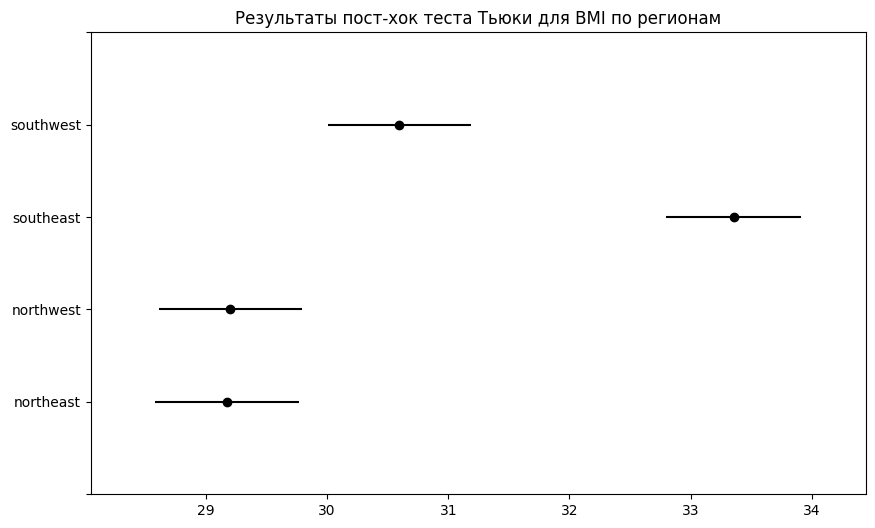

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Пост-хок тест Тьюки
tukey = pairwise_tukeyhsd(df['bmi'], df['region'], alpha=0.05)
print(tukey)

# Построение графика
tukey.plot_simultaneous()
plt.title('Результаты пост-хок теста Тьюки для BMI по регионам')
plt.show()


Из результатов данного теста можно судить о том что различия между northwest и northeast не существенные


Задание 3.5
Выполнить двухфакторный ANOVA тест, чтобы проверить влияние
региона и пола на индекс массы тела (BMI), используя функцию
anova_lm() из библиотеки statsmodels.

In [ ]:
# Определим двухфакторную модель с переменными регион и пол
model_two_factor = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=df).fit()
anova_table_two_factor = sm.stats.anova_lm(model_two_factor, typ=2)
print("Двухфакторный ANOVA тест:\n", anova_table_two_factor)


Двухфакторный ANOVA тест:
                         sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN


В данном случае p-value для региона и пола составило 1.650655e-01, что больше 0.05, что говорит нам об отсутствии значительного эффекта взаимодействия между полом и регионом

Задание 3. 6
Выполнить пост-хок тесты Тьюки и построить график.

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
northeast_female   northeast_male  -0.2998 0.9998 -2.2706  1.6711  False
northeast_female northwest_female  -0.0464    1.0 -2.0142  1.9215  False
northeast_female   northwest_male  -0.2042    1.0 -2.1811  1.7728  False
northeast_female southeast_female   3.3469    0.0    1.41  5.2839   True
northeast_female   southeast_male   4.6657    0.0  2.7634   6.568   True
northeast_female southwest_female   0.7362 0.9497 -1.2377    2.71  False
northeast_female   southwest_male   1.8051 0.1007 -0.1657   3.776  False
  northeast_male northwest_female   0.2534 0.9999 -1.7083  2.2152  False
  northeast_male   northwest_male   0.0956    1.0 -1.8752  2.0665  False
  northeast_male southeast_female   3.6467    0.0  1.7159  5.5775   True
  northeast_male   southeast_male   4.9655    0.0  

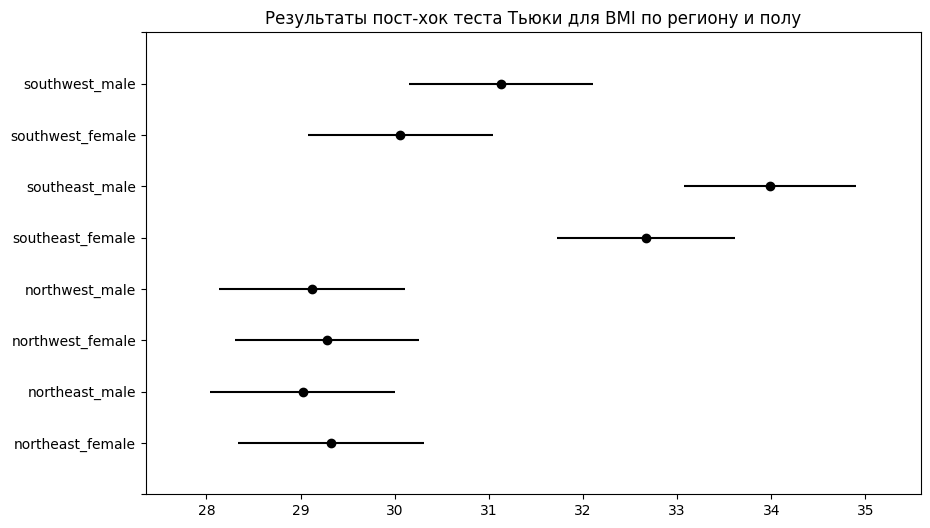

In [ ]:
# Выполнение теста Тьюки для двухфакторного анализа по переменной region:sex
df['region_sex'] = df['region'] + "_" + df['sex']  # создаем объединенную переменную для теста

# Пост-хок тест Тьюки
tukey_two_factor = pairwise_tukeyhsd(df['bmi'], df['region_sex'], alpha=0.05)
print(tukey_two_factor)

# Построение графика
tukey_two_factor.plot_simultaneous()
plt.title('Результаты пост-хок теста Тьюки для BMI по региону и полу')
plt.show()


Результаты данного теста показывают отстуствие существенной разницы между мужщинами и женщинами регионов northwest и northeast, а также имеющуюся разницу между женщинами и мужчинами из регионов southwest и southeast